# Limpeza e preparação dos dados

## 7.1 Manipulação de dados ausentes

Um dos objetivos do pandas é tornar o trabalho com dados ausentes o menos incômodo possível.

Para dados com o dtype `float64`, o pandas usa o valor de ponto flutuante `NaN (Not a Number)` para representar dados ausentes.
Esse valor é chamado de valor de sentinela: quando presente, ele indica um valor ausente (ou nulo):

In [4]:
import pandas as pd
import numpy as np

In [5]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

O método `isna` fornece uma Series booleana com True onde os valores são nulos:

In [6]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

>No pandas adotamos uma convenção usada na linguagem de programação R
que chama os dados ausentes de NA, que significa not available (não
disponível). Em aplicações estatísticas, os dados NA podem ser dados que
não existem, ou que existem, mas não foram observados (por problemas com
a coleta de dados, por exemplo). Na limpeza de dados para análise,
geralmente também é importante fazer a análise nos dados ausentes para a
identificação de problemas de coleta ou das distorções que eles possam
causar.


O valor interno None do Python também é tratado como NA:

In [7]:
string_data = pd.Series(["aardvark",np.nan, None,"avocado"])
string_data

0    aardvark
1         NaN
2        None
3     avocado
dtype: object

In [8]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

In [10]:
float_data = pd.Series([1, 2, None], dtype='float64')
float_data

0    1.0
1    2.0
2    NaN
dtype: float64

In [11]:
float_data.isna()

0    False
1    False
2     True
dtype: bool

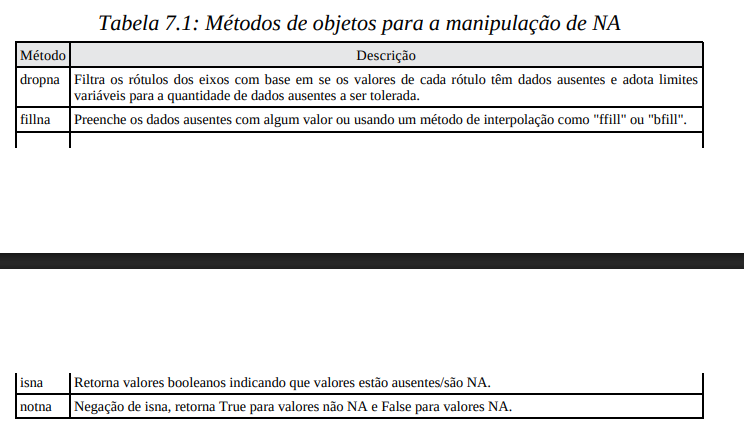

### Filtragem de dados ausentes

Existem algumas maneiras de filtrar dados ausentes. Embora sempre seja
possível fazê-lo manualmente usando `pandas.isna` e a indexação booleana, o
método `dropna` pode ser útil. Em uma Series, ele retorna a Series apenas com
os dados não nulos e os valores dos índices:

In [16]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

Isso é como se fizéssemos o seguinte:

In [17]:
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

Com objetos DataFrame existem diferentes maneiras de remover dados
ausentes. Poderíamos remover linhas ou colunas que só tenham valores NA
ou só remover as linhas ou colunas que não contenham nenhum valor NA.
Por padrão, `dropna` remove qualquer linha que contenha um valor ausente:

In [19]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],[np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [20]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


Passar `how="all"` só removerá linhas que contenham apenas valores NA:

In [21]:
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


>Lembre-se de que essas funções retornam novos objetos por padrão e não
modificam o conteúdo do objeto original.

Para remover colunas com o mesmo critério, passe `axis="columns"`:

In [22]:
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [23]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Suponhamos que você quisesse manter apenas as linhas que contivessem no
máximo um número específico de observações de ausência. É possível
indicar isso com o argumento `thresh`:

In [25]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.047444,NaN,NaN
1,1.065932,NaN,NaN
2,-0.262343,NaN,0.124275
3,-0.773603,NaN,1.465842
4,-1.174005,-0.234556,0.917243
5,-0.892278,-0.990840,-0.233352
6,-0.331342,-0.377381,0.474758


In [26]:
 df.dropna()

,0,1,2
4,-1.174005,-0.234556,0.917243
5,-0.892278,-0.990840,-0.233352
6,-0.331342,-0.377381,0.474758


In [27]:
df.dropna(thresh=2)

,0,1,2
2,-0.262343,NaN,0.124275
3,-0.773603,NaN,1.465842
4,-1.174005,-0.234556,0.917243
5,-0.892278,-0.990840,-0.233352
6,-0.331342,-0.377381,0.474758
